# Proyecto K-Means para la organización de jugadores de futbol

Para empezar el proyecto, importaremos las librerias más esenciales y a medida de que el proyecto vaya requiriendo
se agregarán nuevas librerías que nos serán utiles para el proyecto

In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

Jalaremos la información desde un csv el cual tendrá todos los datos necesarios para poder hacer este proyecto, en este caso
serán las estadisticas de ataque, defensa y medio de jugadores de futbol
Visualizaremos las caracteristicas que hemos recibido para saber que tipo de dato nos enfrentamos, ya sea int o flotante

In [10]:
jugadores=pd.read_csv('D:/Descargas/prueba.csv', engine='python')
jugadores.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nombres  112 non-null    object
 1   atk      112 non-null    int64 
 2   def      112 non-null    int64 
 3   med      112 non-null    int64 
 4   fis      112 non-null    int64 
 5   reg      112 non-null    int64 
 6   pas      112 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.8+ KB


Para tener una mejor visualización de los datos que vamos a manejar, mostraremos los primeros datos que se encuentren en el csv
para poder ver el rango en el que se encuentran los datos

In [11]:
jugadores.head()

,Nombres,atk,def,med,fis,reg,pas
0,Juan,90,60,75,99,100,82
1,Felipe,60,75,90,48,64,84
2,Jafet,60,60,95,61,77,91
3,Palma,95,60,70,53,54,45
4,Eduardo,80,80,80,97,78,60


In [70]:
jugadores_norm= jugadores.drop(['Nombres'],axis=1)
wcss = []

for i in range(1,7):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(jugadores_norm)
    wcss.append(kmeans.inertia_)

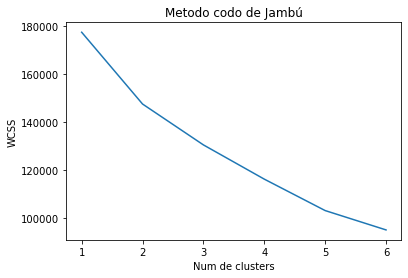

In [71]:
plt.plot(range(1,7),wcss)
plt.title("Metodo codo de Jambú")
plt.xlabel("Num de clusters")
plt.ylabel('WCSS')
plt.show()

Usamos el metodo Kmeans que recibe el numero de clusters que previamente conseguimos y el maximo de iteraciones en una sola corrida del algoritmo, en este caso, usaremos 300.
Despues usaremos el metodo fit para calcular el clustering con los jugadores que tenemos y sus caracteristicas

In [72]:
clustering = KMeans(n_clusters = 3, max_iter = 300)
clustering.fit(jugadores_norm)

KMeans(n_clusters=3)

Ahora que tenemos los clusters, solo se lo agregaremos como una columna más al objeto original llamado jugadores
para poder despues generar un nuevo CSV

In [73]:
jugadores['KMeans_Clusters'] = clustering.labels_
jugadores.head()

,Nombres,atk,def,med,fis,reg,pas,KMeans_Clusters
0,Juan,90,60,75,99,100,82,1
1,Felipe,60,75,90,48,64,84,2
2,Jafet,60,60,95,61,77,91,1
3,Palma,95,60,70,53,54,45,2
4,Eduardo,80,80,80,97,78,60,0


Se usa el analisis de componentes principales para ver como se formaron los clusters, esto reduce la cantidad de 
variables a analizar para poder representar a las variables originales.
Despues, se va a mostrar los valores

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_jugadores = pca.fit_transform(jugadores_norm)
pca_jugadores_df = pd.DataFrame(data=pca_jugadores, columns = ['Ataque','Defensa','Media'] )
pca_nombres_jugadores = pd.concat([pca_jugadores_df, jugadores[['KMeans_Clusters']]], axis=1)

pca_nombres_jugadores


,Ataque,Defensa,Media,KMeans_Clusters
0,-19.663951,41.955911,3.341770,1
1,3.961316,-21.702682,16.437649,2
2,-11.870861,-5.105075,24.138380,1
3,36.400001,1.599073,16.206038,2
4,-14.814259,12.788894,-5.042132,0
...,...,...,...,...
107,-36.006380,14.104136,18.146818,1
108,-12.703710,-13.516185,-8.515722,1
109,-15.457555,-14.292884,10.410102,0
110,-1.829264,-19.913643,-35.707746,0


Importaremos las librerias requeridas para poder graficar.
Para poder graficar los datos que tenemos, asignaremos los colores que queramos, en este caso es azul, verde y naranja
Asignaremos las labels para identificar los espacios en el plano 3D, al igual que le mandaremos los datos a graficar


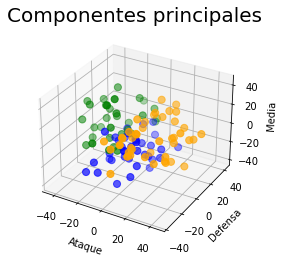

In [75]:


color_theme = np.array(["blue","green","orange"])
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel('Ataque')
ax1.set_ylabel('Defensa')
ax1.set_zlabel('Media')
ax1.set_title('Componentes principales', fontsize=20)
x=pca_nombres_jugadores.Ataque
y=pca_nombres_jugadores.Defensa
z=pca_nombres_jugadores.Media

ax1.scatter(x,y,z,c=color_theme[pca_nombres_jugadores.KMeans_Clusters], s=50)
plt.show()

Generaremos un nuevo CSV con los datos y sus respectivos clusters.

In [76]:
jugadores.to_csv('D:/Descargas/jugadoresActualizados2.csv')

Importaremos la libreria CSV para leer el CSV que acabamos de generar, crearemos 3 listas para atacantes, defensores y medios
respectivamente
Leeremos el CSV y a cada lista le asignaremos los datos que sean correspondientes a su nombre.

In [77]:
import csv,operator
atacantes=[]
defensas=[]
medios=[]
with open('D:/Descargas/jugadoresActualizados2.csv', encoding='utf-8') as csvarchivo:
    entrada = csv.DictReader(csvarchivo)
    for reg in entrada:
        dato=reg['Nombres']
        if(reg['KMeans_Clusters']=='0'):
            atacantes.append(dato)
        elif(reg['KMeans_Clusters']=='1'):
            defensas.append(dato)
        else:
            medios.append(dato)

Desplegaremos los datos organizados por clasificación, en este caso, atacantes, defensas y medios
Y sería todo para acabar el proyecto.

In [78]:
print("La lista de delanteros es: ",atacantes)

La lista de delanteros es:  ['Eduardo', 'Sergio', 'Fernando Gago', 'Sergio Agüero', 'Gabriel Milito', 'Leandro Cufré', 'Lionel Scaloni', 'Hernán Pellerano', 'Johnatan Bottinelli', 'Rodrigo Palacio', 'Julio Ricardo Cruz', 'Osvaldo Ardiles', 'Ramón Díaz', 'Americo Gallego', 'Luis Monti', 'Iker Casillas', 'José María Gutiérrez "Guti"', 'Santiago Cañizares', 'Carlos Marchena', 'Paulino Alcántara *', 'Albert Ferrer', 'Migueli', 'Francisco Carrasco', 'Víctor Muñoz', 'Jon Andoni Goikoetxea', 'Jacinto Quincoces', 'Manchón', 'Puchades', 'Gerardo Torrado', 'Ricardo Osorio', 'Gonzalo Pineda', 'Óscar Rojas', 'Juan Carlos Medina', 'Salvador Carmona', 'Joaquin del Olmo', 'Francisco Javier Cruz', 'Javier Valdivia']


In [79]:
print("La lista de defensas es: ",defensas)


La lista de defensas es:  ['Juan', 'Jafet', 'Carlos Tévez', 'Juan Román Riquelme', 'Mauro Zárate', 'Lisandro López', 'Leandro Somoza', 'Diego Armando Maradona', 'Claudio Borghi', 'Silvio Marzolini', 'Roberto Perfumo', 'Cesc Fábregas', 'Vicente Rodríguez', 'Iván Helguera', 'Rubén Baraja', 'Míchel Salgado', 'David Albelda', 'David Silva', 'Juan Gutiérrez "Juanito"', 'Guillermo Amor', 'Juan Manuel Asensi', 'Joaquín Peiró', 'Lucho', 'López Ufarte', 'Josep Fusté', 'Genar Andrinúa', 'Andrés Guardado', 'Gerardo Galindo', 'Manuel Pérez', 'Carlos Hermosillo', 'Luis Hernández', 'Ramón Ramírez']


In [80]:
print("La lista de medios es: ",medios)

La lista de medios es:  ['Felipe', 'Palma', 'Hernán Crespo', 'Juan Sebastián Verón', 'Pablo Aimar', 'Javier Saviola', 'Daniel Montenegro', 'Pablo Zabaleta', 'Fernando Redondo', 'Mario Kempes', 'Omar Sívori', 'Raúl González', 'Fernando Torres', 'Carles Puyol', 'Fernando Morientes', 'David Villa', 'Sergio Ramos', 'Xavi Hernández', 'Jesús Navas', 'Andrés Iniesta', 'Joaquín Sánchez', 'Jesús Capitán "Capi"', 'Joan Capdevila', 'José Mari Romero', 'Fernando Portillo', 'Javi Navarro', 'Marcos Senna', 'Antonio Puerta', 'Miguel Ángel Nadal', 'José Ramón Alexanko', 'Carles Rexach', 'Pichi Alonso', 'José Mari Bakero', 'Julio Alberto', 'Enrique Castro "Quini"', 'Vicente Del Bosque', 'Lapetra', 'Abel Resino', 'Jesús Mari Satrústegui', 'Cuauhtémoc Blanco', 'Ramón Morales', 'Francisco Palencia', 'Zague']
